#### Représenter les associations 2 à 2 des variables quantitatives par une matrice de nuages de points.

Unnamed: 0                            int64
Country name                         object
Life Ladder                         float64
Log GDP per capita                  float64
Social support                      float64
Healthy life expectancy at birth    float64
Freedom to make life choices        float64
Generosity                          float64
Perceptions of corruption           float64
Positive affect                     float64
Negative affect                     float64
Regional indicator                   object
dtype: object


/usr/local/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

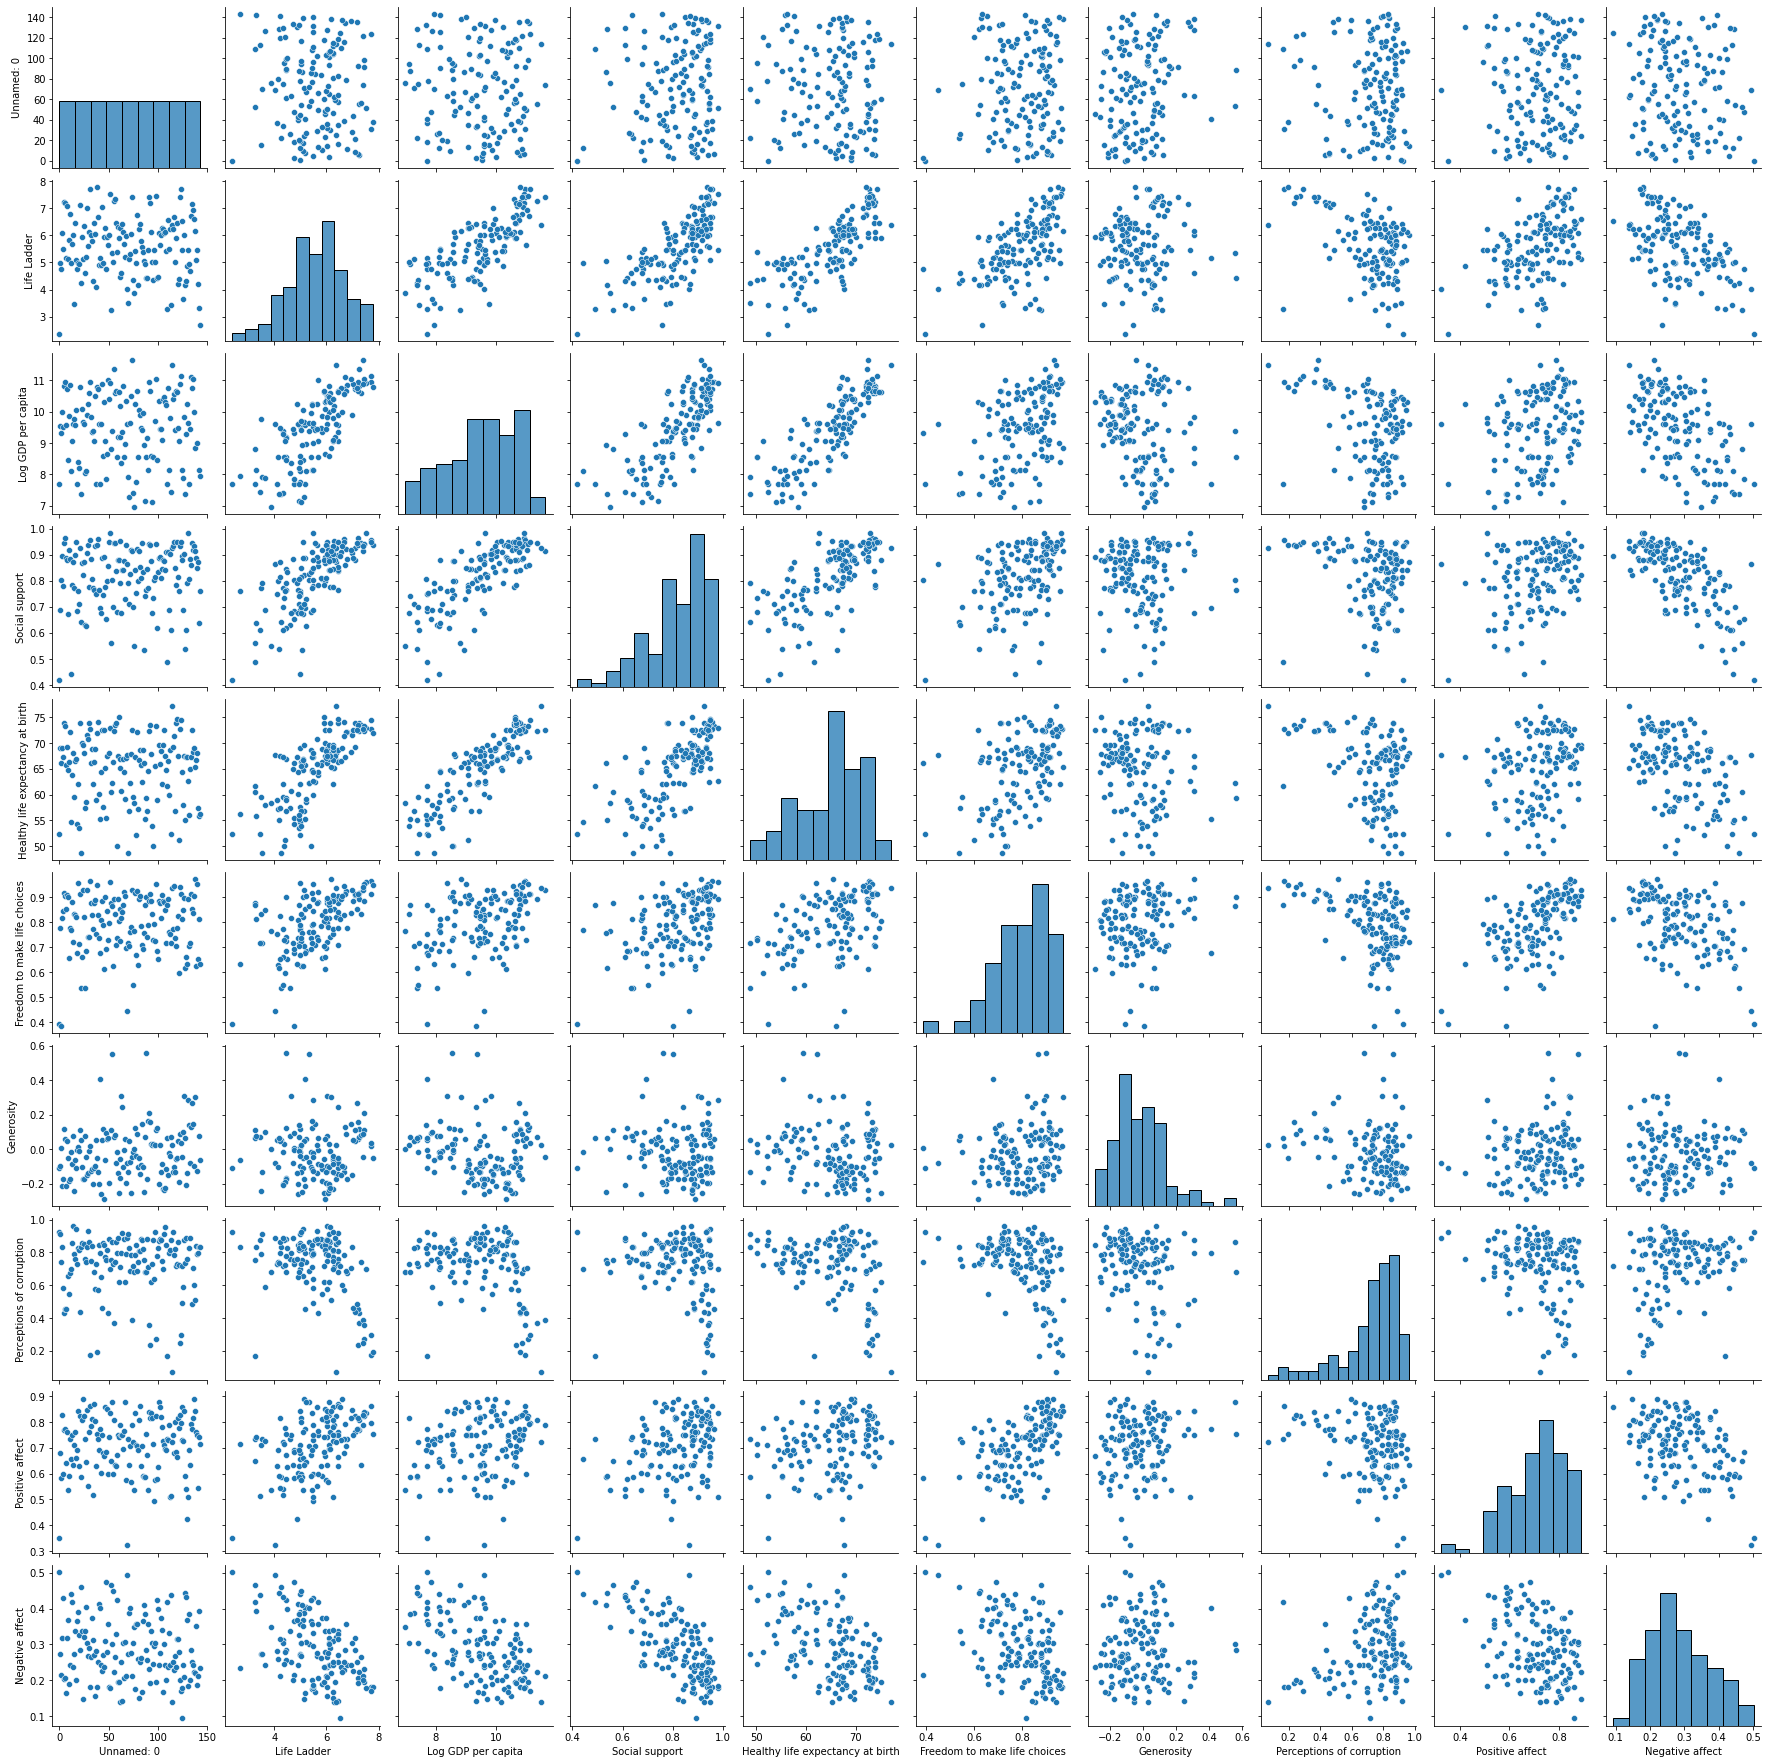

In [7]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

whr_df = pd.read_csv("WHR-2019.csv")
print(whr_df.dtypes)
sns.pairplot(whr_df)

#### représenter cette matrice de corrélation par une carte de chaleur.

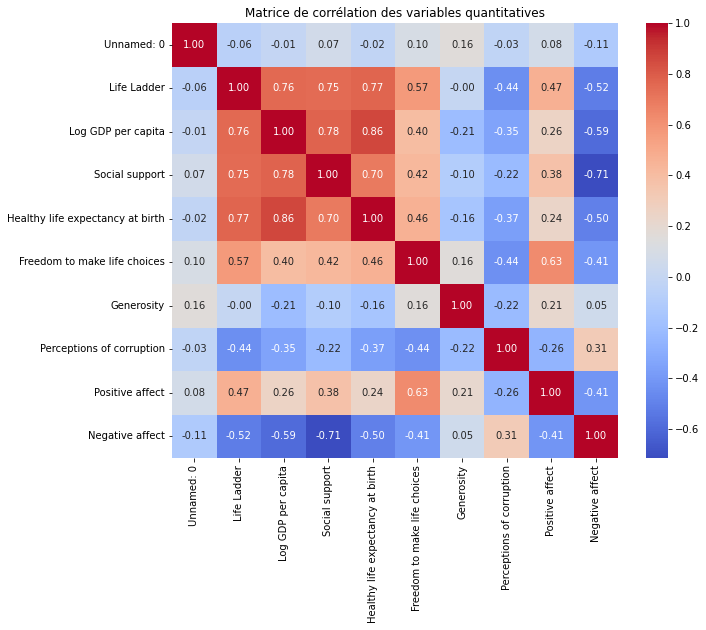

In [7]:
# Exclure les colonnes non numériques
numeric_columns = whr_df.select_dtypes(include=['float64', 'int64']).columns
whr_numeric = whr_df[numeric_columns]

# Calculer la matrice de corrélation
correlation_matrix = whr_numeric.corr()

# Représentation par une carte de chaleur
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matrice de corrélation des variables quantitatives')
plt.show()

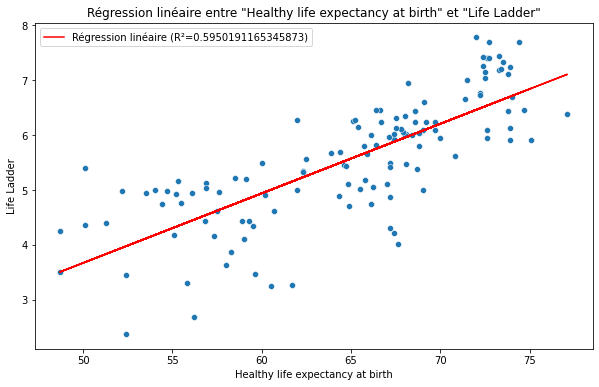

Résultats de la régression linéaire :
pente  : 0.1268446799554649
ordonnée à l'origine : -2.6717704562844533
R² (coefficient de détermination) : 0.5950191165345873


In [14]:
# Supprimer les lignes avec des valeurs manquantes
whr_df.dropna(inplace=True)

# Sélectionner les variables d'intérêt
x = whr_df['Healthy life expectancy at birth']
y = whr_df['Life Ladder']

# la régression linéaire
slope, intercept, r_value, p_value, std_err = linregress(x, y)

plt.figure(figsize=(10, 6))
sns.scatterplot(x=x, y=y)
plt.plot(x, slope*x + intercept, color='red', label=f'Régression linéaire (R²={r_value**2})')
plt.title('Régression linéaire entre "Healthy life expectancy at birth" et "Life Ladder"')
plt.xlabel('Healthy life expectancy at birth')
plt.ylabel('Life Ladder')
plt.legend()
plt.show()

#les résultats de la régression
print("Résultats de la régression linéaire :")
print(f"pente  : {slope}")
print(f"ordonnée à l'origine : {intercept}")
print(f"R² (coefficient de détermination) : {r_value**2}")

In [7]:
import statsmodels.api as sm
import pandas as pd

# Charger le dataset
whr_df = pd.read_csv("WHR-2019.csv")

# Supprimer les lignes avec des valeurs manquantes
whr_df.dropna(inplace=True)

# Sélectionner les variables quantitatives pour la régression multiple
X = whr_df[['Log GDP per capita', 'Social support', 'Healthy life expectancy at birth',
            'Freedom to make life choices', 'Generosity', 'Perceptions of corruption',
            'Positive affect', 'Negative affect']]

# Ajouter une colonne constante pour l'ordonnée à l'origine
X = sm.add_constant(X)

# Variable à prédire
y = whr_df['Life Ladder']

# Créer le modèle OLS
model = sm.OLS(y, X)

# Adapter le modèle aux données
results = model.fit()

# Afficher un résumé des résultats de la régression
print(results.summary())


                            OLS Regression Results                            
Dep. Variable:            Life Ladder   R-squared:                       0.767
Model:                            OLS   Adj. R-squared:                  0.751
Method:                 Least Squares   F-statistic:                     48.20
Date:                Fri, 29 Mar 2024   Prob (F-statistic):           1.57e-33
Time:                        09:59:27   Log-Likelihood:                -101.90
No. Observations:                 126   AIC:                             221.8
Df Residuals:                     117   BIC:                             247.3
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
const   

In [8]:
import statsmodels.api as sm
import pandas as pd

# Charger le dataset
whr_df = pd.read_csv("WHR-2019.csv")

# Supprimer les lignes avec des valeurs manquantes
whr_df.dropna(inplace=True)

# Sélectionner différentes combinaisons de variables explicatives
X1 = whr_df[['Log GDP per capita', 'Social support', 'Healthy life expectancy at birth']]
X2 = whr_df[['Log GDP per capita', 'Social support', 'Freedom to make life choices']]
X3 = whr_df[['Healthy life expectancy at birth', 'Freedom to make life choices', 'Generosity']]
# Ajouter une colonne constante pour l'ordonnée à l'origine
X1 = sm.add_constant(X1)
X2 = sm.add_constant(X2)
X3 = sm.add_constant(X3)

# Variable à prédire
y = whr_df['Life Ladder']

# Créer les modèles OLS pour différentes combinaisons de variables explicatives
model1 = sm.OLS(y, X1)
model2 = sm.OLS(y, X2)
model3 = sm.OLS(y, X3)

# Adapter les modèles aux données
results1 = model1.fit()
results2 = model2.fit()
results3 = model3.fit()

# Afficher un résumé des résultats de chaque régression
print("Régression avec Log GDP per capita, Social support et Healthy life expectancy at birth :")
print(results1.summary())
print("\nRégression avec Log GDP per capita, Social support et Freedom to make life choices :")
print(results2.summary())
print("\nRégression avec Healthy life expectancy at birth, Freedom to make life choices et Generosity :")
print(results3.summary())

Régression avec Log GDP per capita, Social support et Healthy life expectancy at birth :
                            OLS Regression Results                            
Dep. Variable:            Life Ladder   R-squared:                       0.685
Model:                            OLS   Adj. R-squared:                  0.677
Method:                 Least Squares   F-statistic:                     88.45
Date:                Fri, 29 Mar 2024   Prob (F-statistic):           1.82e-30
Time:                        10:00:51   Log-Likelihood:                -120.94
No. Observations:                 126   AIC:                             249.9
Df Residuals:                     122   BIC:                             261.2
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                                       coef    std err          t      P>|t|      [0.025      0.975]
--------------------